In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('data/cc_data.csv')

d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Columns:",list(df.columns.values))
print("Shape:",df.shape)

Columns: ['Transaction ID', 'Account Identifier', 'Account Name', 'Account Number', 'Account Type', 'Bank Name', 'Aggregator Name', 'Consumer ID', 'Consumer Gender', 'Consumer Postal Code', 'Consumer City Name', 'Ethnicity', 'Consumer Birth Year', 'Consumer Created Date', 'Transaction Type', 'Transaction String', 'Normalized Retailer', 'SIC Code', 'SIC Description', 'Purchase Amount', 'Return Amount', 'Reward Amount', 'Transaction Date', 'Posted Date', 'Data Creation Date']
Shape: (3615245, 25)


In [4]:
# remove unnecessary columns
#col2remove = ['Transaction ID','Account Identifier','Account Number','Consumer ID','Posted Date']
#df.drop(col2remove, axis = 1, inplace = True)

In [5]:
print("Columns with numbers: ", list(df.select_dtypes(include=[np.number]).columns.values))
print("Columns with text: ", list(df.select_dtypes(exclude=[np.number]).columns.values))

Columns with numbers:  ['Consumer Birth Year', 'SIC Code', 'Purchase Amount', 'Return Amount', 'Reward Amount']
Columns with text:  ['Transaction ID', 'Account Identifier', 'Account Name', 'Account Number', 'Account Type', 'Bank Name', 'Aggregator Name', 'Consumer ID', 'Consumer Gender', 'Consumer Postal Code', 'Consumer City Name', 'Ethnicity', 'Consumer Created Date', 'Transaction Type', 'Transaction String', 'Normalized Retailer', 'SIC Description', 'Transaction Date', 'Posted Date', 'Data Creation Date']


In [6]:
# Deal with missing values `N/A` in Transaction Date
df['Transaction Date'].replace({"N\A":None}, inplace=True)

# check missing values
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['variable', 'missing counts']
missing_df['missing per (%)'] = (missing_df['missing counts'])/df.shape[0]*100
missing_df.sort_values('missing per (%)',ascending = False).reset_index(drop = True)

,variable,missing counts,missing per (%)
0,Ethnicity,61729,1.707464
1,Transaction Date,8532,0.236001
2,Account Number,24,0.000664
3,Transaction ID,0,0.000000
4,Transaction Type,0,0.000000
5,Posted Date,0,0.000000
6,Reward Amount,0,0.000000
7,Return Amount,0,0.000000
8,Purchase Amount,0,0.000000
9,SIC Description,0,0.000000


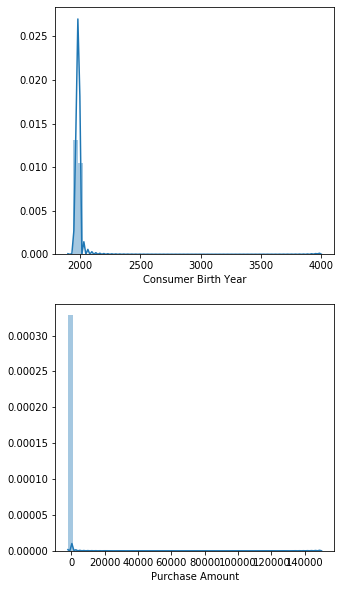

In [7]:
# check columns with number
num_list = ['Consumer Birth Year','Purchase Amount']

f, axes = plt.subplots(len(num_list), 1, figsize=(5, 5*len(num_list)));
for i, column_name in enumerate(num_list):
    sns.distplot(df[column_name],ax=axes[i])

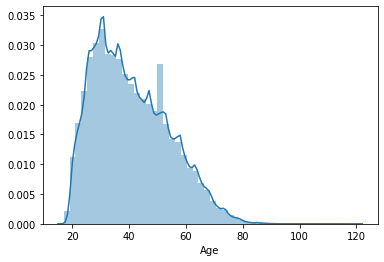

In [8]:
# calculate consumer age, any birth year after 2020 is converted to null
df['Age'] = df['Consumer Birth Year'].apply(lambda x: 2020 - int(x) if int(x) < 2020 else None)
sns.distplot(df['Age']);

In [9]:
text_col_list = ['Account Type', 'Bank Name', 'Aggregator Name','Consumer Gender','Consumer City Name',
                 'Ethnicity', 'Transaction Type','Normalized Retailer', 'SIC Description']
#text_col_list = ['Bank Name']
def view_column_counts(df,col_name):
    df_pivot = df.groupby(by = col_name).size().reset_index(name='Counts')
    df_pivot['Per (%)'] = (df_pivot['Counts'])/df.shape[0]*100
    df_pivot.sort_values(by = 'Counts',ascending = False,inplace = True)
    return df_pivot

for col_name in text_col_list:   
    print(col_name)
    print(view_column_counts(df,col_name))
    print('\n')
    


Account Type
         Account Type   Counts    Per (%)
0        bank_account  1927690  53.321144
1         credit_card  1687050  46.664887
2  investment_account      385   0.010649
3               loans      120   0.003319


Bank Name
           Bank Name   Counts    Per (%)
6               cibc  3162645  87.480793
15               rbc   123578   3.418247
19                td    98511   2.724878
0   american_express    58611   1.621218
16            scotia    57468   1.589602
2                bmo    36480   1.009060
18         tangerine    29467   0.815076
17           simplii    26344   0.728692
3      canadian_tire     8823   0.244050
8         desjardins     6275   0.173571
12          meridian     1880   0.052002
4        capital_one     1261   0.034880
13               nbc      748   0.020690
14                pc      556   0.015379
9               hsbc      515   0.014245
20           vancity      480   0.013277
11              mbna      462   0.012779
10      laurentienne      3

Interesting findings here:
 - Account Type: good balance between bank_account and credit_card
 - Bank Name: large proportion (~86%) on cibc
 - Aggregator Name: large proportion (~86%) on cibc
 - Consumer Gender: 55% female and 44% male
 - Ethnicity: 78% white and 13% asian and rest
 - Normalized Retailer: Top 5 are Tim Hortons, McDonald's, Walmart, Amazon and Shoppers Drug Mart
 - SIC (Standard Industrial Classification): Eating Places, Grocery Stores, Gasoline, Book Stores and Drug Stores contains up to ~70%

In [10]:
# Total purchase amount and transaction counts over time
df_TS = df.groupby("Transaction Date").agg({'Purchase Amount': 'sum','Transaction ID':'count'}).rename(columns={'Purchase Amount':'Purchase Sum','Transaction ID':'Transaction Count'})
print(df_TS)

                  Purchase Sum  Transaction Count
Transaction Date                                 
2016-04-13                3.80                  1
2016-04-17                5.80                  1
2016-04-18                3.41                  1
2016-04-20               33.98                  3
2016-04-22                8.13                  1
...                        ...                ...
2020-01-30           261694.24               7655
2020-01-31            54455.03               1273
2020-02-01             1852.60                 24
2020-02-02               66.82                  3
2020-02-03             8875.10                137

[1358 rows x 2 columns]


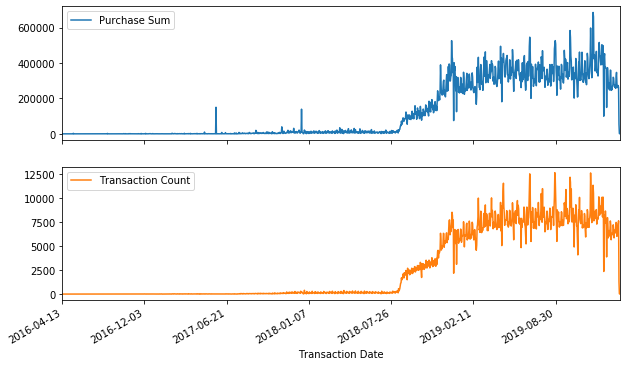

In [11]:
df_TS.plot(subplots = True, y= ["Purchase Sum","Transaction Count"], figsize=(10,6));

Most of the transactions started from Aug 2018 to the end of 2019, normalization against customer numbers may be needed.

In [12]:
# only keep data from Aug 2018 to Dec 2019 for top 5 sectors, and check their temporal variations
df['Date'] = pd.to_datetime(df['Transaction Date'])  
df = df[(df['Date'] > '2018-08-01') & (df['Date'] <= '2019-12-31')]

top5list = ["Eating Places","Grocery Stores","Gasoline Service Stations","Book Store","Drug Stores and Proprietary Stores"]
df = df[df['SIC Description'].str.contains('|'.join(top5list))]

In [13]:
df_TS_sector = df.groupby(["Date","SIC Description"]).agg({'Purchase Amount': 'sum'})
df_TS_sector.head(20)

Purchase Amount
Date       SIC Description                                    
2018-08-02 Book Stores                                  392.93
           Drug Stores and Proprietary Stores           245.23
           Eating Places                               1895.03
           Gasoline Service Stations                    425.80
           Grocery Stores                              1035.60
2018-08-03 Book Stores                                  111.83
           Drug Stores and Proprietary Stores           160.43
           Eating Places                               1783.90
           Gasoline Service Stations                    996.67
           Grocery Stores                              1563.67
2018-08-04 Book Stores                                  197.77
           Drug Stores and Proprietary Stores           105.02
           Eating Places                                726.72
           Gasoline Service Stations                    236.61
           Grocery Stores                              1413.83
2018-08-05 Book Stores                                  155.03
           Drug Stores and Proprietary Stores            60.28
           Eating Places                               2131.73
           Gasoline Service Stations                    449.36
           Grocery Stores                               142.09

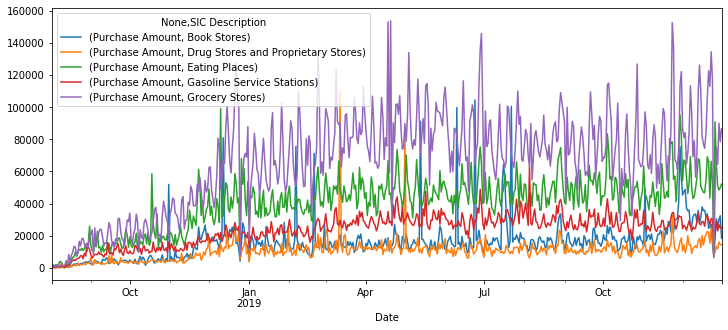

In [14]:
df_TS_sector.unstack(level=1).plot(subplots = False, y= ["Purchase Amount"], figsize=(12,5));

Interesting findings:
 - Grocery Stores and Eating Places have weekly variations, checking the amount on each day of the week (Mon, Tue...) may shed new insights?
 - Gasoline and Drug Stores'contributions are relatively stable.